In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats 
import random 
import time

$H_0: p = 0,01$ 

$H_1: p > 0,01$

In [3]:
α = 0.05 
p0 = 0.01 

In [4]:
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 

p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

[  30   50  100  200  500 1000]
[0.012 0.015 0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1  ]


In [5]:
st = time.time() 

powers_total = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 99.45507574081421 seconds


In [6]:
#print( len(powers_total), len(sample_sizes), len(p1s) ) 

a1 = [p1s[0]] * len(sample_sizes)

for i in range(1, len(p1s)): 
    a1 += [list(p1s)[i]] * len(sample_sizes)
    
#print(a1)
len(a1) 

b1 = list(pd.Series(a1).round(3))

d1 = {"p1": b1, "n": list(sample_sizes) * len(p1s), "power": powers_total}
df1 = pd.DataFrame(d1)

df1.dtypes 

df11 = df1
df11["n"] = df11["n"].astype(str)
df11.dtypes 

df111 = df11.pivot_table(values = "power", index = "p1", columns = "n")

df111 = df111[[str(n) for n in sample_sizes]]

In [7]:
import matplotlib as mpl
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.style"] = "normal"

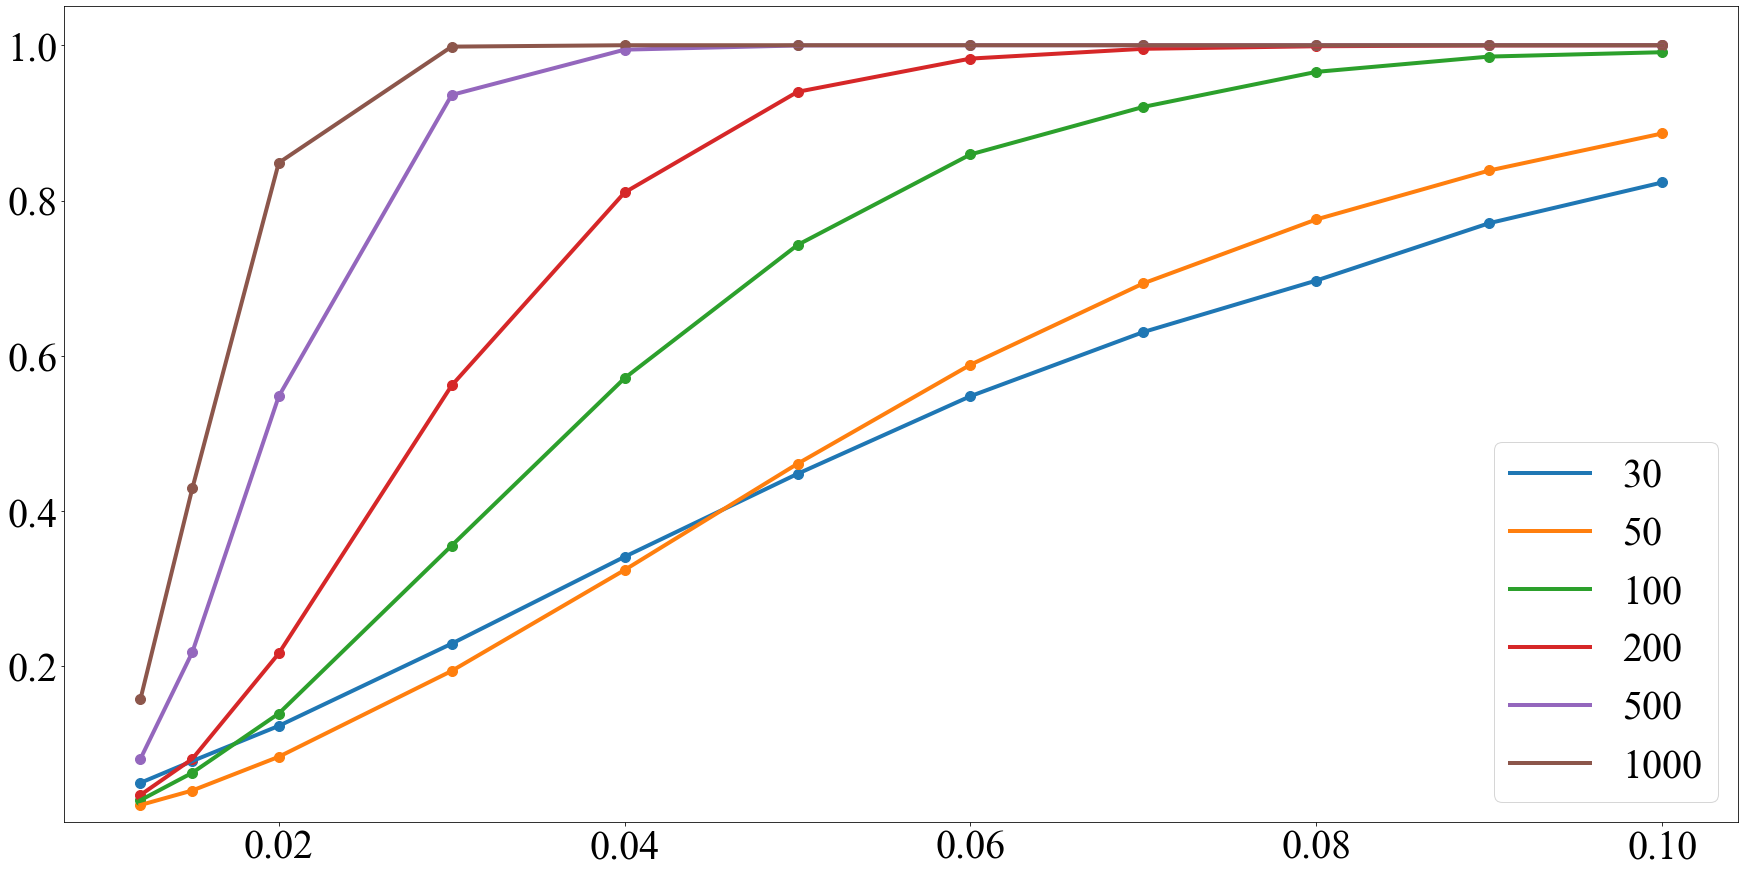

In [8]:
%matplotlib inline

plt.figure(figsize = (30, 15))

for c in df111.columns: 
    plt.scatter(x = df111[c].index, y = df111[c], s = 100)
    plt.plot(df111[c].index, df111[c], "-", label = c, linewidth = 4)

plt.ylim([0, 1.05])
plt.xticks(fontsize = 40) 
plt.yticks(list(np.arange(.2, 1.1, .2)), fontsize = 40)
plt.legend(fontsize = 40)
plt.show() 

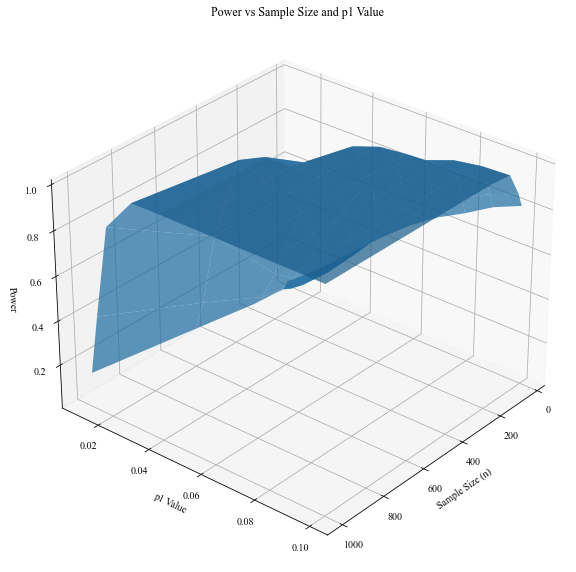

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid of sample sizes and p1 values
n_mesh, p1_mesh = np.meshgrid(sample_sizes, p1s)

# Reshape the powers_total list into the same shape as the meshgrid
powers_mesh = np.array(powers_total).reshape(len(p1s), len(sample_sizes))

# Create a 3D plot
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(n_mesh, p1_mesh, powers_mesh, alpha=0.7)

# Set labels and title
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('p1 Value')
ax.set_zlabel('Power')
ax.set_title('Power vs Sample Size and p1 Value') 

# Set the rotation angles
ax.view_init(elev=30, azim=40)  # Adjust the elevation (elev) and azimuth (azim) angles as desired

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


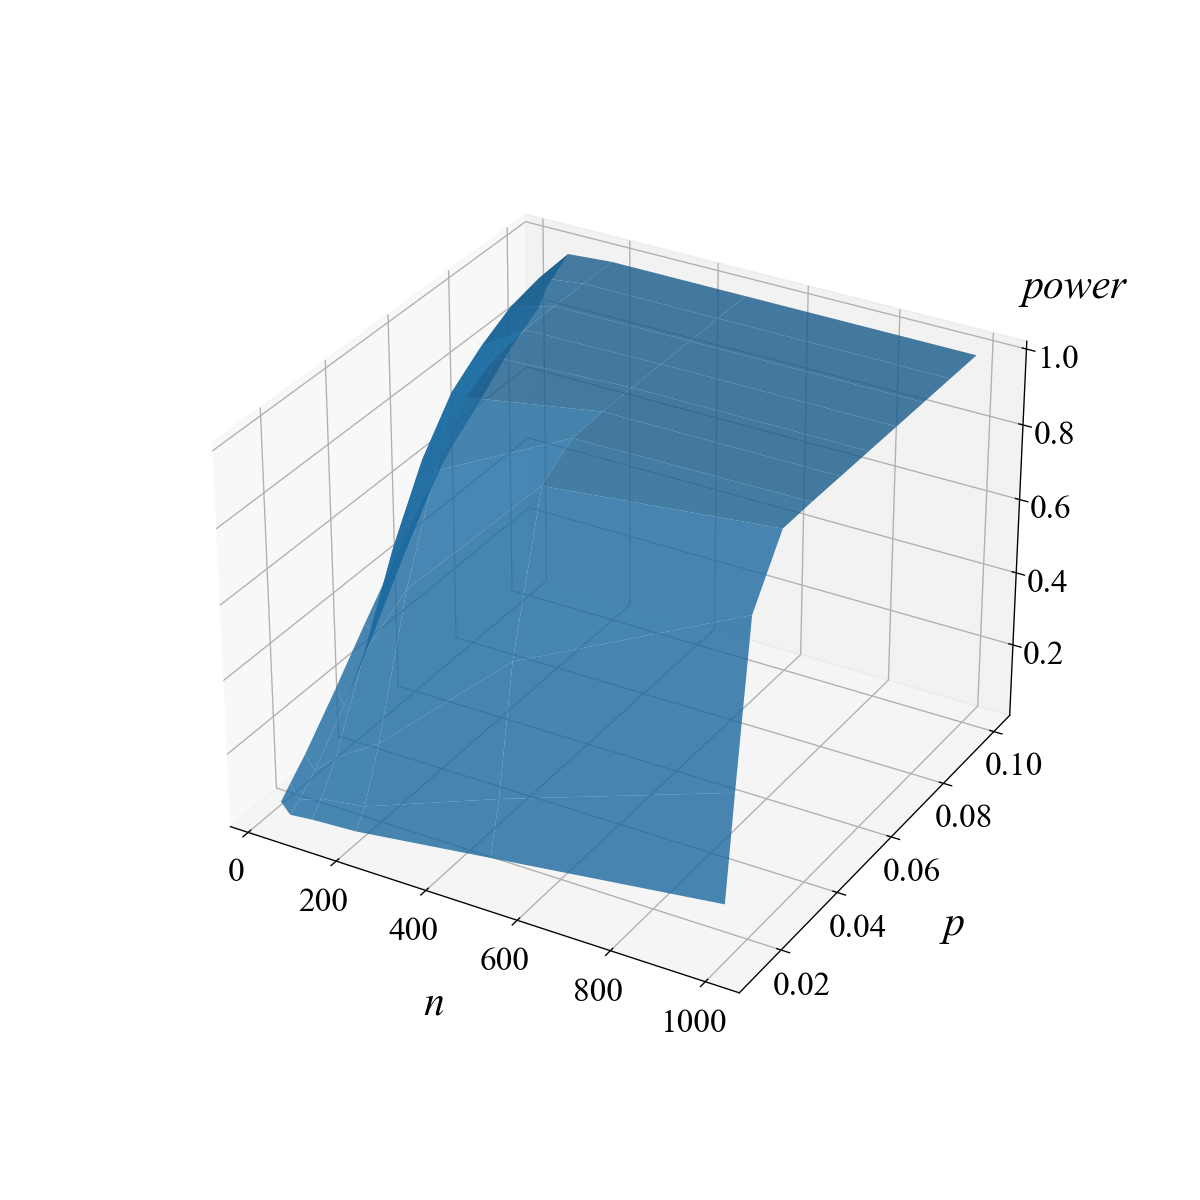

In [10]:
# Import the interactive backend
%matplotlib notebook

# Create a 3D plot
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')

# Plot the surface with transparency
ax.plot_surface(n_mesh, p1_mesh, powers_mesh, alpha = 0.8)

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
#ax.set_title('Power vs Sample Size and p1 Value') 
z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_zticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize = 20)

# Show the plot
plt.show()